<a href="https://colab.research.google.com/github/jmichaelschultz/CIFAR10/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR dataset 

The intention of this noteboook is purely for fun! i wanted to experiment with trying different hyperparameters on a dataset i am not familar with

From Wikipedia, the free encyclopedia: """

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.[1][2] The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.[3] The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.[4]

Computer algorithms for recognizing objects in photos often learn by example. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works. Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

CIFAR-10 is a labeled subset of the 80 million tiny images dataset. When the dataset was created, students were paid to label all of the images.[5]

"""

In [8]:
import os 
import sklearn
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(path)
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

####CIFAR10 dataset.

You can load it with keras.datasets.cifar10.load_data(). 
The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. 
Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]
keras.backend.clear_session()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
### building a very large model for learning purposes. then we will mess with it to improve results 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

##### Callbacks & scheduler

In [24]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.00001, s=25)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model.fit(X_train, y_train, epochs=1000,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/1000
1407/1407 [==============================] - 18s 10ms/step - loss: 6.0695 - accuracy: 0.1663 - val_loss: 2.2285 - val_accuracy: 0.2034
Epoch 2/1000
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0745 - accuracy: 0.2404 - val_loss: 2.2745 - val_accuracy: 0.2178
Epoch 3/1000
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9605 - accuracy: 0.2808 - val_loss: 2.0664 - val_accuracy: 0.2572
Epoch 4/1000
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8877 - accuracy: 0.3087 - val_loss: 1.9183 - val_accuracy: 0.2938
Epoch 5/1000
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8274 - accuracy: 0.3324 - val_loss: 1.8302 - val_accuracy: 0.3382
Epoch 6/1000
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7732 - accuracy: 0.3574 - val_loss: 1.8098 - val_accuracy: 0.3502
Epoch 7/1000
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7187 - accuracy: 0.3765 - val_

In [ ]:
## this allows a look at the eval of the best model 
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 2ms/step - loss: 1.4753 - accuracy: 0.4822


[1.4752825498580933, 0.4821999967098236]

In [ ]:
#adding learning_rate callback 
keras.backend.clear_session()

callbacks2 = [early_stopping_cb,lr_scheduler]

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=1000,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks2)


Epoch 1/1000
1407/1407 [==============================] - 16s 9ms/step - loss: 9.1680 - accuracy: 0.2054 - val_loss: 2.0166 - val_accuracy: 0.2422 - lr: 0.0010
Epoch 2/1000
1407/1407 [==============================] - 12s 9ms/step - loss: 1.9620 - accuracy: 0.2638 - val_loss: 2.0107 - val_accuracy: 0.2542 - lr: 9.1201e-04
Epoch 3/1000
1407/1407 [==============================] - 12s 9ms/step - loss: 1.9112 - accuracy: 0.2948 - val_loss: 1.9431 - val_accuracy: 0.2802 - lr: 8.3176e-04
Epoch 4/1000
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8815 - accuracy: 0.3082 - val_loss: 2.0640 - val_accuracy: 0.2548 - lr: 7.5858e-04
Epoch 5/1000
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8533 - accuracy: 0.3193 - val_loss: 1.8190 - val_accuracy: 0.3352 - lr: 6.9183e-04
Epoch 6/1000
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8274 - accuracy: 0.3286 - val_loss: 1.7895 - val_accuracy: 0.3352 - lr: 6.3096e-04
Epoch 7/1000
1407/14

### Solving this problem the right way.

###### in the readme i mentioned that the real solution to this problem is likely building a CNN. I will show that to be true by using transfer learning on a CNN


In [5]:
y_train.shape

(45000, 1)

In [11]:
y_train_cat = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_valid_cat = tf.keras.utils.to_categorical(y_valid,num_classes=10)

y_train_cat.shape

(45000, 10)

In [12]:
vgg19 = tf.keras.applications.VGG19(include_top=False,weights="imagenet",input_shape=(32,32,3))

80150528/80134624 [==============================] - 1s 0us/step


In [15]:
model = keras.models.Sequential()
for layer in vgg19.layers:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Dense(256))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [16]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= .001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [20]:
hist = model.fit(X_train, y_train_cat, epochs=1000,
          validation_data=(X_valid, y_valid_cat),
          callbacks=[tensorboard_cb, early_stopping_cb, model_checkpoint_cb])

Epoch 1/1000
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4903 - accuracy: 0.5192 - val_loss: 1.4504 - val_accuracy: 0.5252
Epoch 2/1000
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3584 - accuracy: 0.5385 - val_loss: 1.3143 - val_accuracy: 0.5538
Epoch 3/1000
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3481 - accuracy: 0.5438 - val_loss: 1.3936 - val_accuracy: 0.5252
Epoch 4/1000
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3501 - accuracy: 0.5409 - val_loss: 1.4486 - val_accuracy: 0.5118
Epoch 5/1000
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3263 - accuracy: 0.5452 - val_loss: 1.3340 - val_accuracy: 0.5444
Epoch 6/1000
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2919 - accuracy: 0.5563 - val_loss: 1.3015 - val_accuracy: 0.5568
Epoch 7/1000
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2708 - accuracy: 0.5603 - val_

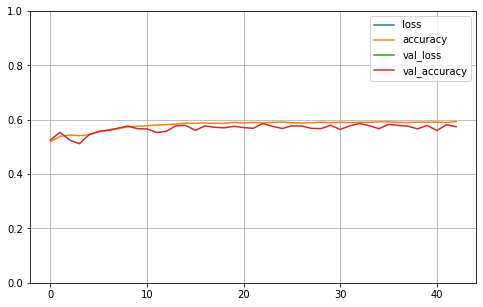

In [22]:
pd.DataFrame(hist.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
### the top layers should be fairly well trained. unfreezing bottom layers. lowering learning rate and continuing training
for layer in model.layers: 
  layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(learning_rate= .00001), loss = 'categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train, y_train_cat, epochs=1000,
          validation_data=(X_valid, y_valid_cat),
          callbacks=[tensorboard_cb, early_stopping_cb, model_checkpoint_cb])

Epoch 1/1000
1407/1407 [==============================] - 40s 27ms/step - loss: 0.8418 - accuracy: 0.7107 - val_loss: 0.6641 - val_accuracy: 0.7704
Epoch 2/1000
1407/1407 [==============================] - 38s 27ms/step - loss: 0.5639 - accuracy: 0.8049 - val_loss: 0.5771 - val_accuracy: 0.8124
Epoch 3/1000
1407/1407 [==============================] - 38s 27ms/step - loss: 0.4235 - accuracy: 0.8504 - val_loss: 0.5698 - val_accuracy: 0.8142
Epoch 4/1000
1407/1407 [==============================] - 36s 25ms/step - loss: 0.3153 - accuracy: 0.8888 - val_loss: 0.5835 - val_accuracy: 0.8196
Epoch 5/1000
1407/1407 [==============================] - 37s 27ms/step - loss: 0.2242 - accuracy: 0.9200 - val_loss: 0.5499 - val_accuracy: 0.8314
Epoch 6/1000
1407/1407 [==============================] - 36s 25ms/step - loss: 0.1584 - accuracy: 0.9449 - val_loss: 0.6020 - val_accuracy: 0.8268
Epoch 7/1000
1407/1407 [==============================] - 35s 25ms/step - loss: 0.1115 - accuracy: 0.9612 - val_

In [26]:
### its very clear that this solution is much better than a DNN at solving this issue. 83% validation accuaracy is not bad. lets add augment the data to see the effect.
## i expect it will add some noise to the training loss but hopefully will give an improvement on validation as a result of gerneralization 

generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1) 

#including exp lr_weight decay 
model.compile(optimizer=keras.optimizers.Adam(learning_rate= .00001), loss = 'categorical_crossentropy', metrics = 'accuracy')
history = model.fit(generator.flow(X_train, y_train_cat), epochs=1000,
          validation_data=(X_valid, y_valid_cat),
          callbacks=[tensorboard_cb, early_stopping_cb, model_checkpoint_cb, lr_scheduler])

Epoch 1/1000
1407/1407 [==============================] - 40s 28ms/step - loss: 0.2495 - accuracy: 0.9219 - val_loss: 0.5448 - val_accuracy: 0.8460 - lr: 1.0000e-05
Epoch 2/1000
1407/1407 [==============================] - 39s 27ms/step - loss: 0.1777 - accuracy: 0.9435 - val_loss: 0.5421 - val_accuracy: 0.8482 - lr: 9.1201e-06
Epoch 3/1000
1407/1407 [==============================] - 39s 27ms/step - loss: 0.1371 - accuracy: 0.9547 - val_loss: 0.5407 - val_accuracy: 0.8454 - lr: 8.3176e-06
Epoch 4/1000
1407/1407 [==============================] - 37s 26ms/step - loss: 0.1103 - accuracy: 0.9649 - val_loss: 0.5722 - val_accuracy: 0.8504 - lr: 7.5858e-06
Epoch 5/1000
1407/1407 [==============================] - 36s 26ms/step - loss: 0.0824 - accuracy: 0.9735 - val_loss: 0.6417 - val_accuracy: 0.8540 - lr: 6.9183e-06
Epoch 6/1000
1407/1407 [==============================] - 37s 26ms/step - loss: 0.0700 - accuracy: 0.9774 - val_loss: 0.6441 - val_accuracy: 0.8542 - lr: 6.3096e-06
Epoch 7/10

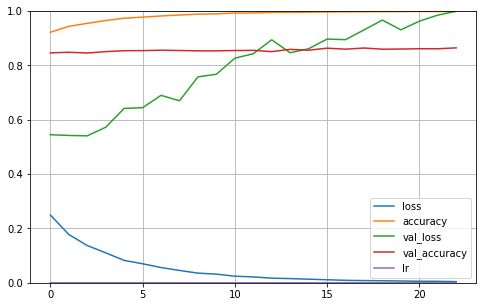

In [27]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

its clear based on these results that a the VG19 model signficantly outpeformed a simple DNN for this problem. For me i am considering this problem solved. 86% acccuracy on validation is great! if i were to need a better solution to this problem i would experiment with using a different pre-train NN. 